# Assignment Day 27 - K_Nearest Neighbours

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Convert text into numeric

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
print(label_encoder.classes_)
print('\nsex :\n',data['Sex'].head())
print('\nEmbarked :\n',data['Embarked'].head())

['C' 'Q' 'S']

sex :
 0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

Embarked :
 0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32


In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [7]:
import numpy as np
data['Fare']=np.round(data['Fare'])

In [8]:
data['Fare']=np.round(data['Fare'])

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.0,2
1,1,1,0,38.0,1,0,71.0,0
2,1,3,0,26.0,0,0,8.0,2
3,1,1,0,35.0,1,0,53.0,2
4,0,3,1,35.0,0,0,8.0,2


# K_NN

In [16]:
from sklearn import neighbors

In [148]:
y = data['Pclass']
x = data.drop(['Pclass'],axis=1)

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [150]:
x_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
350,0,1,45.0,0,0,35.0,2
124,1,1,12.0,1,0,11.0,0
577,0,0,45.0,1,0,14.0,0
422,0,0,28.0,1,1,14.0,2
118,0,0,2.0,4,2,31.0,2


## User define function for iteration 1 to 267

In [151]:
def prediction(n):
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 268
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8764044943820225
Confusion matrix when k is 1  
 [[ 61   7   2]
 [  3  35  11]
 [  1   9 138]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8614232209737828
Confusion matrix when k is 2  
 [[ 67   2   1]
 [  7  37   5]
 [  4  18 126]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.846441947565543
Confusion matrix when k is 3  
 [[ 60   7   3]
 [  7  26  16]
 [  3   5 140]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.8202247191011236
Confusion matrix when k is 4  
 [[ 61   6   3]
 [  8  28  13]
 [  3  15 130]]
-------------------------------------------


Acuuracy when k is 38  0.7940074906367042
Confusion matrix when k is 38  
 [[ 62   5   3]
 [  7  22  20]
 [  7  13 128]]
--------------------------------------------------------------------------------------
Here k value is 39: 

Acuuracy when k is 39  0.7865168539325843
Confusion matrix when k is 39  
 [[ 62   6   2]
 [  7  20  22]
 [  7  13 128]]
--------------------------------------------------------------------------------------
Here k value is 40: 

Acuuracy when k is 40  0.7902621722846442
Confusion matrix when k is 40  
 [[ 62   6   2]
 [  7  20  22]
 [  7  12 129]]
--------------------------------------------------------------------------------------
Here k value is 41: 

Acuuracy when k is 41  0.7865168539325843
Confusion matrix when k is 41  
 [[ 62   6   2]
 [  7  19  23]
 [  7  12 129]]
--------------------------------------------------------------------------------------
Here k value is 42: 

Acuuracy when k is 42  0.7865168539325843
Confusion matrix when k is 42  
 [[ 6


Acuuracy when k is 75  0.7715355805243446
Confusion matrix when k is 75  
 [[ 57   6   7]
 [  5  11  33]
 [  5   5 138]]
--------------------------------------------------------------------------------------
Here k value is 76: 

Acuuracy when k is 76  0.7677902621722846
Confusion matrix when k is 76  
 [[ 57   6   7]
 [  5  11  33]
 [  5   6 137]]
--------------------------------------------------------------------------------------
Here k value is 77: 

Acuuracy when k is 77  0.7715355805243446
Confusion matrix when k is 77  
 [[ 57   6   7]
 [  5  11  33]
 [  5   5 138]]
--------------------------------------------------------------------------------------
Here k value is 78: 

Acuuracy when k is 78  0.7640449438202247
Confusion matrix when k is 78  
 [[ 56   5   9]
 [  5  11  33]
 [  5   6 137]]
--------------------------------------------------------------------------------------
Here k value is 79: 

Acuuracy when k is 79  0.7640449438202247
Confusion matrix when k is 79  
 [[ 5


Acuuracy when k is 113  0.7490636704119851
Confusion matrix when k is 113  
 [[ 53   9   8]
 [  5  12  32]
 [  5   8 135]]
--------------------------------------------------------------------------------------
Here k value is 114: 

Acuuracy when k is 114  0.7453183520599251
Confusion matrix when k is 114  
 [[ 53   9   8]
 [  5  12  32]
 [  5   9 134]]
--------------------------------------------------------------------------------------
Here k value is 115: 

Acuuracy when k is 115  0.7490636704119851
Confusion matrix when k is 115  
 [[ 53  10   7]
 [  5  12  32]
 [  5   8 135]]
--------------------------------------------------------------------------------------
Here k value is 116: 

Acuuracy when k is 116  0.7490636704119851
Confusion matrix when k is 116  
 [[ 53  11   6]
 [  5  12  32]
 [  5   8 135]]
--------------------------------------------------------------------------------------
Here k value is 117: 

Acuuracy when k is 117  0.7490636704119851
Confusion matrix when k 


Acuuracy when k is 149  0.7677902621722846
Confusion matrix when k is 149  
 [[ 52  13   5]
 [  5  11  33]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 150: 

Acuuracy when k is 150  0.7640449438202247
Confusion matrix when k is 150  
 [[ 52  13   5]
 [  5  10  34]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 151: 

Acuuracy when k is 151  0.7640449438202247
Confusion matrix when k is 151  
 [[ 52  13   5]
 [  5  10  34]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 152: 

Acuuracy when k is 152  0.7640449438202247
Confusion matrix when k is 152  
 [[ 52  11   7]
 [  5  10  34]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 153: 

Acuuracy when k is 153  0.7677902621722846
Confusion matrix when k 


Acuuracy when k is 185  0.7453183520599251
Confusion matrix when k is 185  
 [[ 51   5  14]
 [  5   5  39]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 186: 

Acuuracy when k is 186  0.7453183520599251
Confusion matrix when k is 186  
 [[ 51   5  14]
 [  5   5  39]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 187: 

Acuuracy when k is 187  0.7453183520599251
Confusion matrix when k is 187  
 [[ 51   5  14]
 [  5   5  39]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 188: 

Acuuracy when k is 188  0.7453183520599251
Confusion matrix when k is 188  
 [[ 51   5  14]
 [  5   5  39]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 189: 

Acuuracy when k is 189  0.7453183520599251
Confusion matrix when k 


Acuuracy when k is 221  0.7228464419475655
Confusion matrix when k is 221  
 [[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 222: 

Acuuracy when k is 222  0.7228464419475655
Confusion matrix when k is 222  
 [[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 223: 

Acuuracy when k is 223  0.7228464419475655
Confusion matrix when k is 223  
 [[ 48   1  21]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 224: 

Acuuracy when k is 224  0.7228464419475655
Confusion matrix when k is 224  
 [[ 48   1  21]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 225: 

Acuuracy when k is 225  0.7228464419475655
Confusion matrix when k 


Acuuracy when k is 259  0.7191011235955056
Confusion matrix when k is 259  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 260: 

Acuuracy when k is 260  0.7191011235955056
Confusion matrix when k is 260  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 261: 

Acuuracy when k is 261  0.7191011235955056
Confusion matrix when k is 261  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 262: 

Acuuracy when k is 262  0.7191011235955056
Confusion matrix when k is 262  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 263: 

Acuuracy when k is 263  0.7191011235955056
Confusion matrix when k 

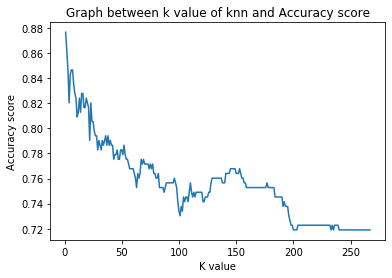

In [152]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)